# **By: Basant Ahmed Ragab Mohamed**

## About The Dataset

The Student Performance Factors dataset provides a comprehensive overview of various elements that influence student exam outcomes.

It includes both academic and personal attributes such as **study hours, attendance, parental involvement, motivation level, access to resources, teacher quality, and more.**

These features together offer valuable insights into how different behavioral, social, and environmental factors contribute to a student's academic performance.

**Goal:**

The main goal of this project is to build a **predictive model that estimates students’ final exam scores based on multiple performance-related factors**.

Through data exploration, visualization, and regression modeling, we aim to:

* Understand the most significant factors affecting exam results.

* Predict students’ scores accurately using a Linear Regression model.

* Provide actionable insights that can help educators and parents enhance student performance.

## Load and explore the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
data = pd.read_csv('/content/sample_data/StudentPerformanceFactors.csv')

In [ ]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.shape

(6607, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


We Found that there is a null values in some columns, so we need to fill them

### Handle Missing Values

Fill with the mode of each column since all are categorical columns

In [ ]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-231612233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
print("Missing Values After Cleaning:")
print(data.isnull().sum())

Missing Values After Cleaning:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Ensuring that we successfuly filled the missing values.

## Exploratory Data Analysis

/tmp/ipython-input-3507986772.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parental_Involvement', y='Exam_Score', data=data, palette='Set2', ax=axes[3])
/tmp/ipython-input-3507986772.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Access_to_Resources', y='Exam_Score', data=data, palette='Set3', ax=axes[4])


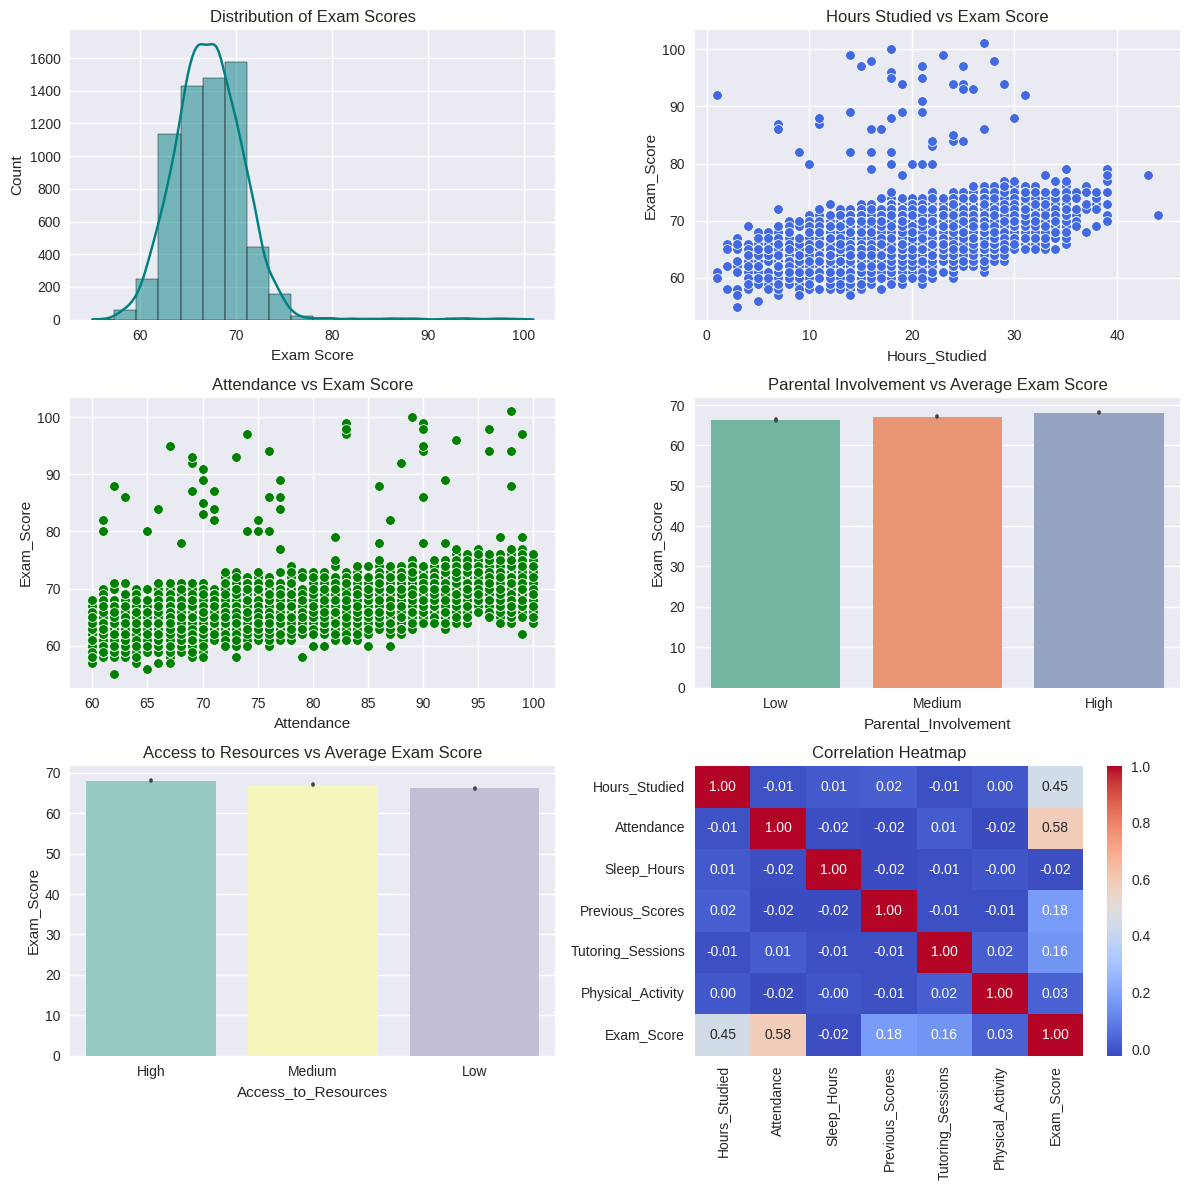

In [ ]:
plt.style.use('seaborn-v0_8')

# Set up the grid — 3 rows × 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Distribution of Exam Scores
sns.histplot(data['Exam_Score'], bins=20, kde=True, color='teal', ax=axes[0])
axes[0].set_title('Distribution of Exam Scores')
axes[0].set_xlabel('Exam Score')

# Hours Studied vs Exam Score
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data, color='royalblue', ax=axes[1])
axes[1].set_title('Hours Studied vs Exam Score')

# Attendance vs Exam Score
sns.scatterplot(x='Attendance', y='Exam_Score', data=data, color='green', ax=axes[2])
axes[2].set_title('Attendance vs Exam Score')

# Parental Involvement vs Exam Score
sns.barplot(x='Parental_Involvement', y='Exam_Score', data=data, palette='Set2', ax=axes[3])
axes[3].set_title('Parental Involvement vs Average Exam Score')

# Access to Resources vs Exam Score
sns.barplot(x='Access_to_Resources', y='Exam_Score', data=data, palette='Set3', ax=axes[4])
axes[4].set_title('Access to Resources vs Average Exam Score')

# Correlation Heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[5])
axes[5].set_title('Correlation Heatmap')

# Adjust layout
plt.tight_layout()
plt.show()


### EDA Insights

1. Distribution of Exam Scores <br>
    * Exam scores are roughly normally distributed with a slight right tail.<br>
    * Most students score between 60–80, meaning moderate performance overall.

2. Hours Studied vs Exam Score<br>
    * A clear positive correlation — more study hours lead to higher exam scores.<br>
    * his will likely be one of the strongest predictors in your model.

3. Attendance vs Exam Score<br>
    * Also positively correlated — students with higher attendance generally perform better.<br>
    * The relationship is slightly weaker than study hours but still important.

4. Parental Involvement & Access to Resources<br>
    * Both show some positive impact, but not a huge variation across levels.<br>
    * Indicates that while helpful, these factors may not strongly determine the score alone.

5. Correlation Heatmap<br>
* Strongest correlations with Exam_Score:<br>
  * Hours_Studied → ~0.45
  * Attendance → ~0.58

* Previous_Scores and Tutoring_Sessions also show mild positive correlation.

### Detecting the Outliers

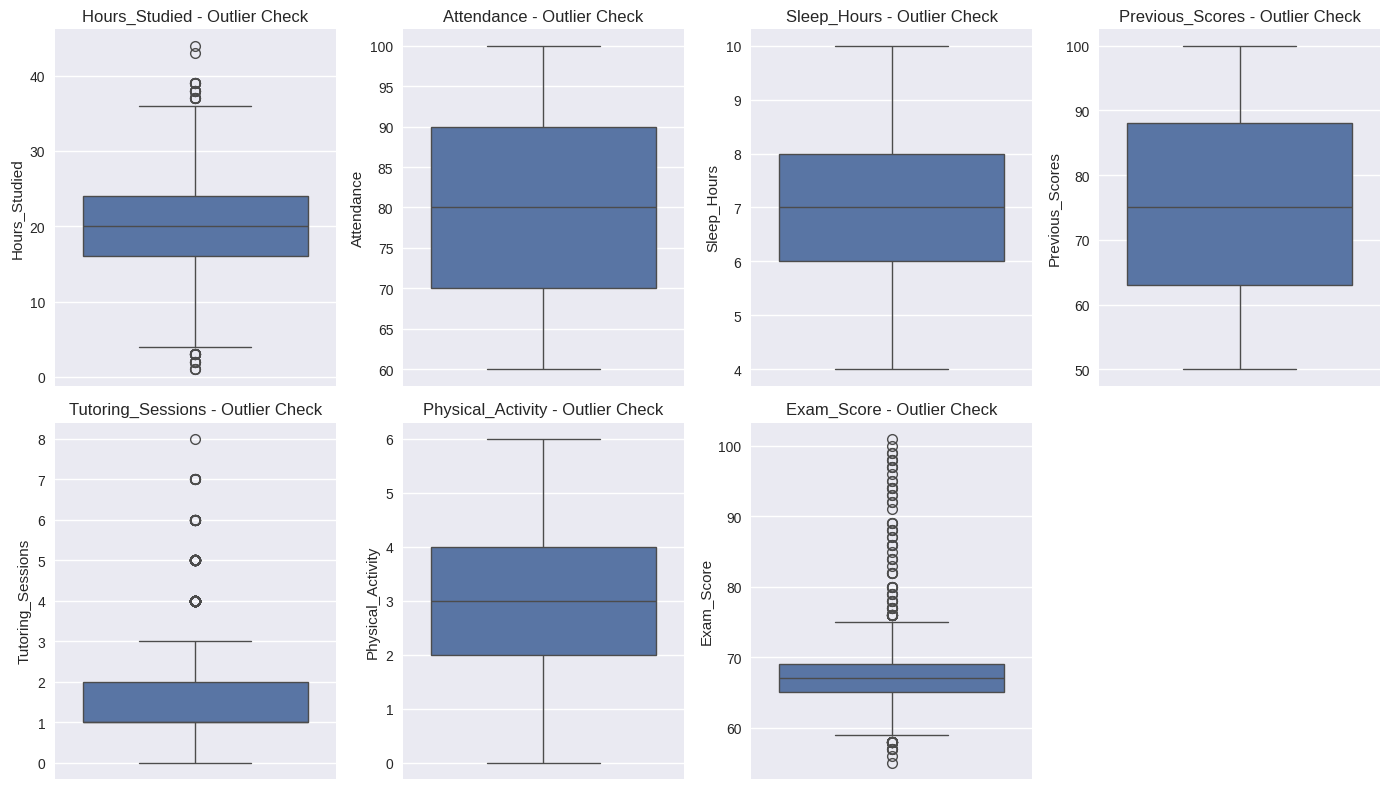

Outlier Count per Column:
Hours_Studied: 43
Attendance: 0
Sleep_Hours: 0
Previous_Scores: 0
Tutoring_Sessions: 430
Physical_Activity: 0
Exam_Score: 104


In [ ]:
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                'Previous_Scores', 'Tutoring_Sessions',
                'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'{col} - Outlier Check')
plt.tight_layout()
plt.show()

outlier_summary = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

print("Outlier Count per Column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")


### Handling the Outliers

In [ ]:
original_data = data.copy()

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply capping to numeric columns with many outliers
cols_to_cap = ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']
for col in cols_to_cap:
    data = cap_outliers(data, col)

print("✅ Outliers capped successfully!")


✅ Outliers capped successfully!


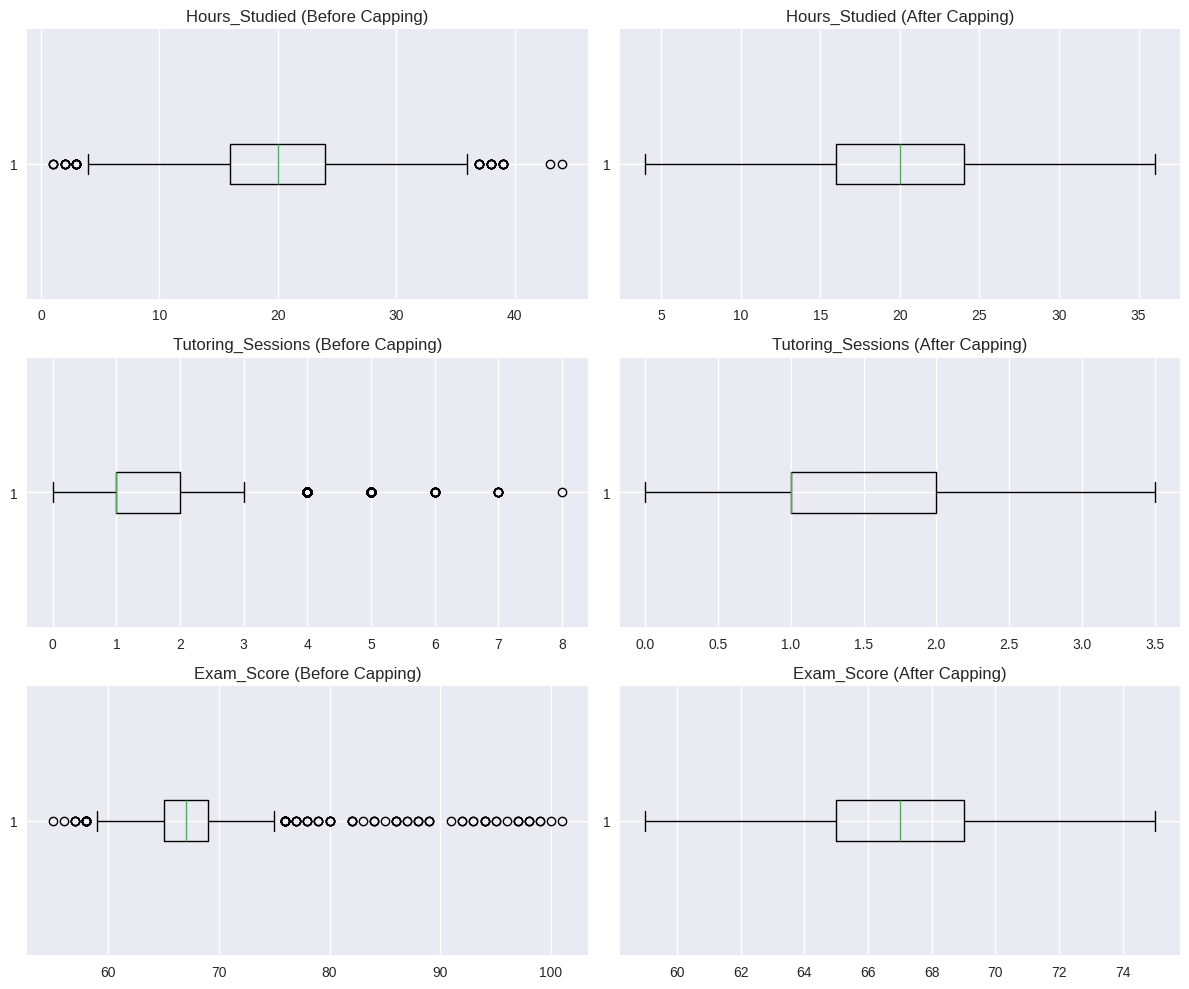

In [ ]:
cols_to_visualize = ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']

# Create side-by-side boxplots for before and after capping
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

for i, col in enumerate(cols_to_visualize):
    axes[i, 0].boxplot(original_data[col], vert=False)
    axes[i, 0].set_title(f'{col} (Before Capping)')

    axes[i, 1].boxplot(data[col], vert=False)
    axes[i, 1].set_title(f'{col} (After Capping)')

plt.tight_layout()
plt.show()


Ensuring there are no outliers now

## Feature Selection & Encoding

In [ ]:
selected_features = [
    'Hours_Studied',
    'Attendance',
    'Parental_Involvement',
    'Access_to_Resources',
    'Previous_Scores',
    'Motivation_Level',
    'Tutoring_Sessions',
    'Family_Income',
    'Teacher_Quality',
    'School_Type'
]

target = 'Exam_Score'

In [ ]:
# Copy selected features into X and target into y
X = data[selected_features].copy()
y = data[target]

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [ ]:
print(" Encoded Feature Sample:")
display(X.head())

print("Target Sample:")
print(y.head())


 Encoded Feature Sample:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type
0,23,84,1,0,73,1,0.0,1,2,1
1,19,64,1,2,59,1,2.0,2,2,1
2,24,98,2,2,91,2,2.0,2,2,1
3,29,89,1,2,98,2,1.0,2,2,1
4,19,92,2,2,65,2,3.0,2,0,1


Target Sample:
0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64


All selected features have been successfully encoded into numeric format, making the dataset ready for model training.

Categorical variables are now represented numerically, which allows the regression model to process them effectively.

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Evaluate model performance

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.11
Mean Squared Error (MSE): 2.22
Root Mean Squared Error (RMSE): 1.49
R² Score: 0.80


**Model Performance Insights:**

* Mean Absolute Error (MAE): 1.11 → on average, predictions are off by only ~1 point.
* Mean Squared Error (MSE): 2.22 → small squared error, showing stable predictions.

* Root Mean Squared Error (RMSE): 1.49 → model’s typical prediction error is under 2 points.

* R² Score: 0.80 → the model explains 80% of the variance in exam scores, indicating strong predictive power.

The low MAE and RMSE values confirm that the model provides precise and consistent predictions.

The model generalizes well, capturing the key relationships between study habits, tutoring, and exam outcomes.

*The linear regression model performs **reliably** for predicting student exam scores based on study habits, attendance, and other related factors.*

## Visualization of Predictions

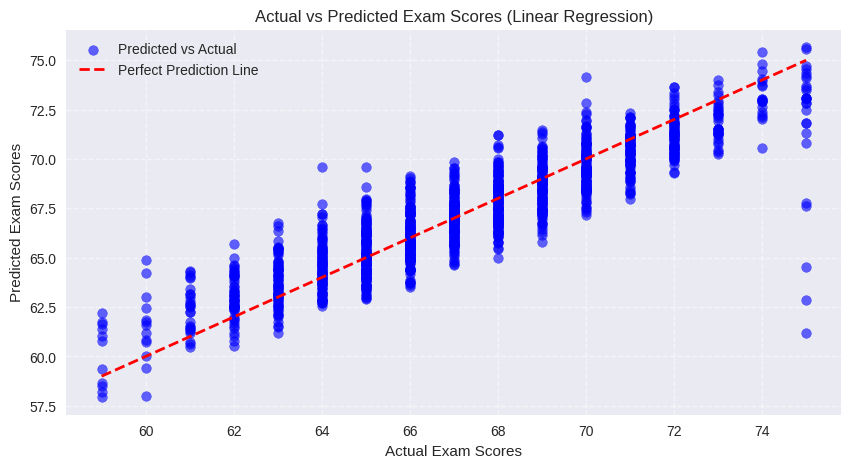

In [ ]:
# Compare actual vs predicted scores
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Insights from Actual vs Predicted Exam Scores**

* Most points are clustered closely around the red line, indicating **strong model accuracy**.

* There are **no major deviations**, meaning the model **generalizes well to unseen data**.

* The linear pattern confirms that the relationship between study factors and exam scores is **mostly linear**, which aligns with the regression assumption.

## Conclusion

The model successfully predicts student exam performance with good accuracy.

Key predictors:
* Hours Studied
* Attendance
* Motivation Level
* Parental Involvement
* Teacher Quality

## Recommendations

* Encourage students to maintain consistent study habits and regular attendance to boost performance.

* Strengthen parental involvement and teacher quality through school programs and training.

* Provide additional support and motivation programs for students with fewer resources or lower engagement.

* Identify and monitor outlier students to offer targeted academic assistance and counseling.